In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

import sys 
import os
sys.path.append(os.path.abspath("../notebooks/"))
import df_maker, df_trimmer

In [3]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))

# Recidivism Plot

The dataset ratio of people who, over a three year period, 
went back to jail to those who did not, was 1:2.

In [4]:
df_recid = df[df.recid_flag == 1]

In [5]:
recid_count = len(df_recid)
no_recid_count = len(df[df.recid_flag == 0])

In [6]:
x_axis = [recid_count,no_recid_count]
print(x_axis)

[8311, 15839]


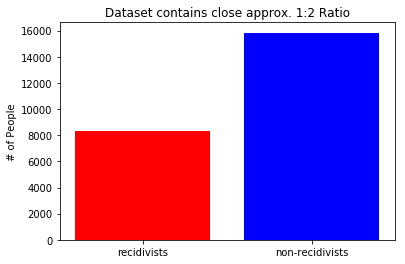

In [7]:
fig, ax = plt.subplots()
plt.bar([1,2], x_axis, color = ['red', 'blue'])
plt.xticks([1,2],['recidivists','non-recidivists'])
plt.ylabel('# of People')
plt.title('Dataset contains close approx. 1:2 Ratio')
plt.savefig('Recid_ratio.svg')

# Age and Race Demographic Plots


The dataset is heavily weighted with released prisoners who are white.

In [22]:
mask_race = ['recid_flag', 'race_American Indian or Alaska Native - Non-Hispanic',
 'race_Asian or Pacific Islander - Non-Hispanic',
 'race_Black - Non-Hispanic',
 'race_White - Hispanic',
 'race_White - Non-Hispanic']

dem_race = df[mask_race]

In [30]:
race_pops = dem_race.sum()[1:]
races = race_pops.index
races
race_counts = race_pops.values
sorted(race_counts)

[175, 463, 1365, 5687, 16460]

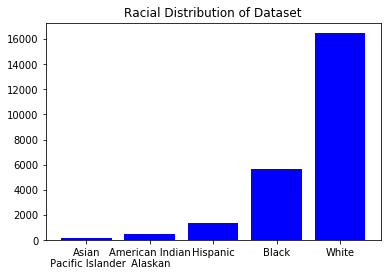

In [31]:
races = ['Asian\n Pacific Islander', 'American Indian\n Alaskan','Hispanic',  'Black',  'White' ]
race_counts = sorted(race_pops.values)
fig, ax = plt.subplots()
plt.bar(races, race_counts, color='blue')
plt.title('Racial Distribution of Dataset')

plt.savefig('../presentation/RaceDist.svg', bbox_inches="tight")


The largest age group of released ex-offenders was between 25-34.  
This age range was defined by the designers of the study.

In [8]:
age_mask = ['recid_flag', 'age_at_release_25-34',
 'age_at_release_35-44',
 'age_at_release_45-54',
 'age_at_release_55 and Older',
 'age_at_release_Under 25']
df_age = df[age_mask]
df_age.sum()

recid_flag                     8311
age_at_release_25-34           8849
age_at_release_35-44           5830
age_at_release_45-54           4071
age_at_release_55 and Older    1188
age_at_release_Under 25        4212
dtype: int64

In [9]:
age_sums = df_age.sum()[1:]
age_reord = [age_sums[-1], age_sums[0], age_sums[1], age_sums[2], age_sums[3]]
age_counts = age_sums.values
age_labels = age_sums.index
age_labels = [ 'Under 25','25-34', '35-44', '45-54', '55+']


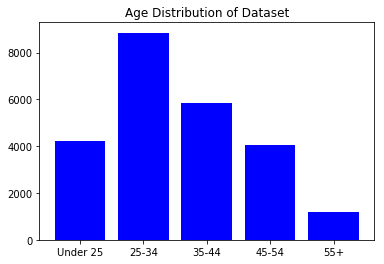

In [10]:
fig, ax = plt.subplots()
plt.bar(age_labels, age_reord, color='blue')
plt.title('Age Distribution of Dataset')
plt.savefig('../presentation/AgeDist.svg')

# Investigation of Largest Features

This portion of the eda looks at all of the recidivist records,<br>
and calculates, for each feature, the percentage of records with 
a feature value of one.  

In [12]:
df_rec = df.groupby(df.recid_flag[df.recid_flag==1]).sum()
df_rec.drop('recid_flag', axis=1, inplace=True)

In [13]:
large_features = []
large_feature_vals = []
for header, value in df_rec.items():
    if value[1] > 1500:
        large_features.append(header)
        large_feature_vals.append(value[1])

In [14]:
large_feature_total = [df[feature].sum() for feature in large_features]


In [15]:
large_feature_perc = []
for total, recid_sum in zip(large_feature_total, large_feature_vals):
    large_feature_perc.append(recid_sum/total)

[Text(0, 0, 'target_pop_flag'),
 Text(0, 0, 'year_released_2012'),
 Text(0, 0, 'year_released_2013'),
 Text(0, 0, 'year_released_2015'),
 Text(0, 0, 'reporting_year_2015'),
 Text(0, 0, 'reporting_year_2016'),
 Text(0, 0, 'reporting_year_2018'),
 Text(0, 0, 'race_Black - Non-Hispanic'),
 Text(0, 0, 'race_White - Non-Hispanic'),
 Text(0, 0, 'age_at_release_25-34'),
 Text(0, 0, 'age_at_release_35-44'),
 Text(0, 0, 'age_at_release_Under 25'),
 Text(0, 0, 'conviction_class_C Felony'),
 Text(0, 0, 'conviction_class_D Felony'),
 Text(0, 0, 'convicting_type_Drug'),
 Text(0, 0, 'convicting_type_Property'),
 Text(0, 0, 'conviction_subtype_Trafficking'),
 Text(0, 0, 'release_type_Parole'),
 Text(0, 0, 'release_type_Parole Granted'),
 Text(0, 0, 'supervising_district_5JD'),
 Text(0, 0, 'supervising_district_None-Discharged')]

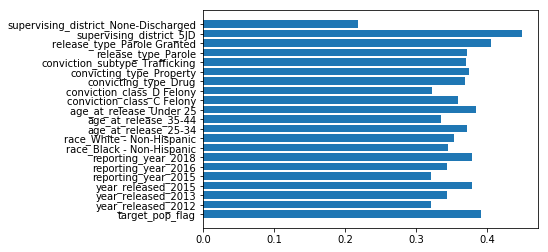

In [18]:
fig, ax = plt.subplots()
plt.barh(y=large_features, width = large_feature_perc)
ax.set_yticklabels(large_features)


# Looking at recidivism percentages across specific feature groups

Below, you will find counts of different features,
as well as very large, colorful plots meant for data exploration only. 

## All features

In [15]:
#since they are all binaries, sum is the total population count for each demographic
df.sum().sort_values(ascending=True)

conviction_class_Other Felony (Old Code)                      2
conviction_class_Sexual Predator Community Supervision        2
conviction_class_Simple Misdemeanor                           3
conviction_class_A Felony                                     4
conviction_class_Other Felony                                 6
conviction_subtype_Animals                                    6
conviction_subtype_Stolen Property                            9
conviction_class_Felony - Mandatory Minimum                  10
conviction_subtype_Prostitution/Pimping                      32
conviction_subtype_Special Sentence Revocation               63
conviction_subtype_Kidnap                                    63
release_type_Paroled to Detainer - Iowa                      65
conviction_class_Special Sentence 2005                       69
release_type_Paroled to Detainer - U.S. Marshall             77
conviction_subtype_Flight/Escape                             78
conviction_subtype_Sex Offender Registry

In [16]:
df_recid.sum().sort_values(ascending=True)

conviction_class_A Felony                                    0
conviction_class_Other Felony (Old Code)                     0
conviction_class_Sexual Predator Community Supervision       0
conviction_class_Simple Misdemeanor                          0
conviction_subtype_Animals                                   1
conviction_class_Felony - Mandatory Minimum                  2
conviction_class_Other Felony                                3
release_type_Paroled to Detainer - INS                       4
conviction_subtype_Stolen Property                           4
release_type_Paroled to Detainer - U.S. Marshall             5
conviction_subtype_Kidnap                                    8
conviction_subtype_Prostitution/Pimping                     11
conviction_subtype_Special Sentence Revocation              29
conviction_class_Special Sentence 2005                      34
supervising_district_Interstate Compact                     35
conviction_subtype_Flight/Escape                       

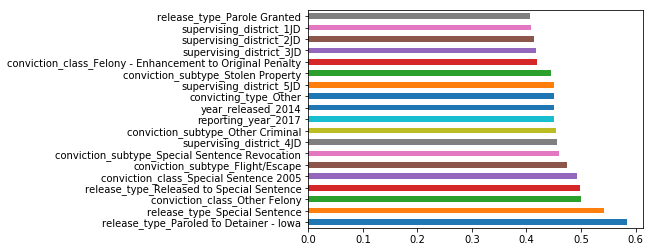

In [19]:
percent_recid = np.divide(df_recid.sum(),df.sum())
percent_recid.to_csv('perc_recid.csv')
percent_recid = percent_recid.sort_values(ascending=False)
percent_recid[1:20].plot(kind='barh')

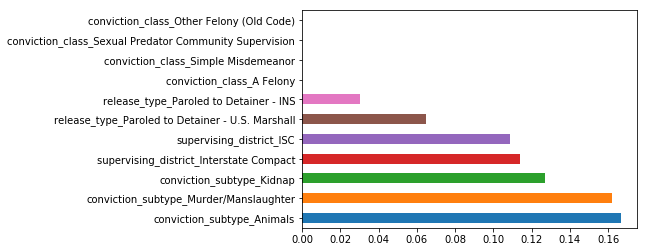

In [20]:
percent_recid[80:].plot(kind='barh')

## Function to prepare df for plot

In [48]:
def percent_recid(df_maker_type):
    df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
    df = df_maker_type(df)
    target = pd.DataFrame(df[1])
    df = pd.merge(target, df[0], left_index=True, right_index=True)
    df_recid = df[df.recid_flag == 1]
    percent_recid = np.divide(df_recid.sum(),df.sum())
    percent_recid = percent_recid.sort_values(ascending=False)
    return percent_recid

## no years no target

Plot of the recidivism percentages of the subset of data which doesn't include<br>
year released, data collection year, or target population features.

In [41]:
percent_rec_noyrs_notarg = percent_recid(df_trimmer.no_years_no_target)

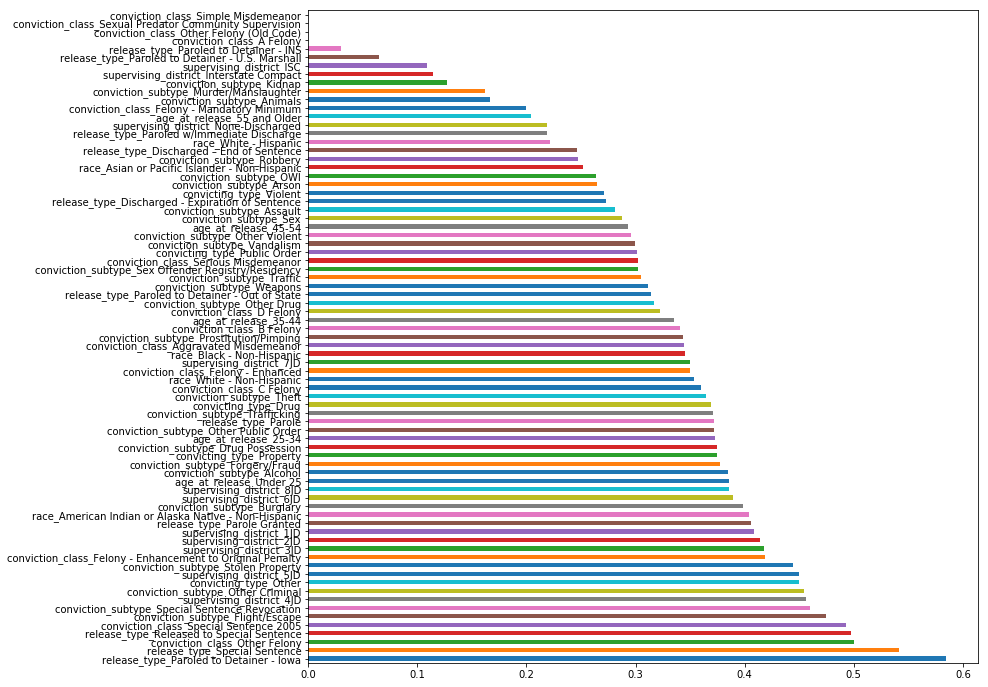

In [42]:
plt.figure(figsize=(12,12))
percent_rec_noyrs_notarg[1:].plot(kind='barh')

## Class

The subset of data which considers only felony class, the broadest set 
of conviction description.

In [43]:
percent_recid_conv = percent_recid(df_trimmer.conv_class)

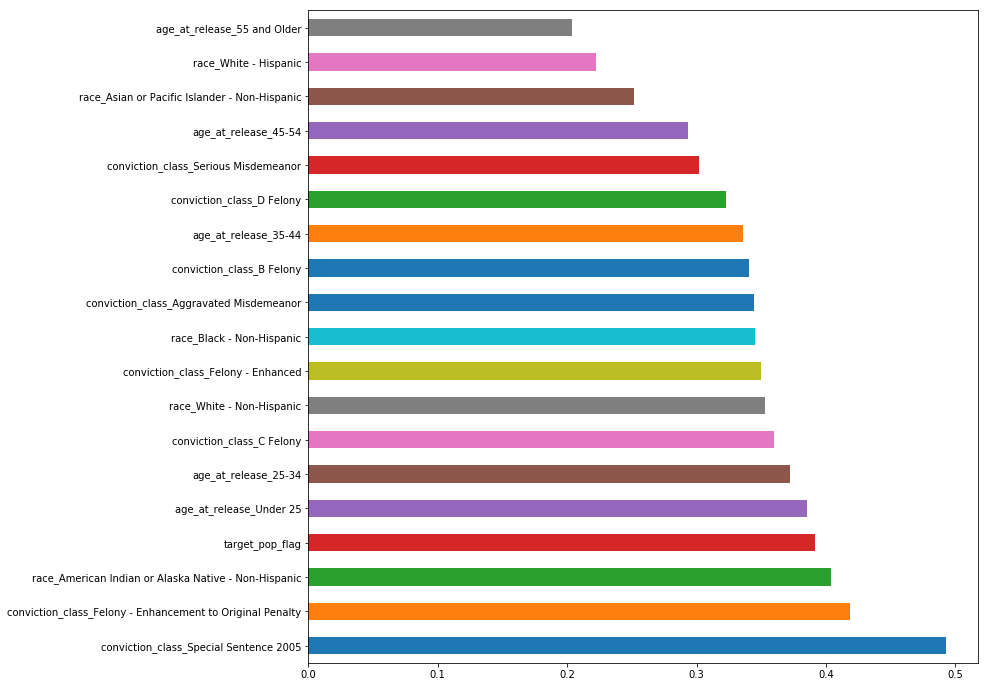

In [44]:
plt.figure(figsize=(12,12))
percent_recid_conv[1:30].plot(kind='barh')

## Subtype

The dataset including subtype, the most detailed description of offense,<br>
not including the target popluation flag, year released or year collected features.

In [50]:
df = pickle.load(open('../data/pickles/df_full.pickle', 'rb'))
df_subt = df_trimmer.subt_no_targ_no_years(df)
target = pd.DataFrame(df_subt[1])
df = pd.merge(target, df_subt[0], left_index=True, right_index=True)
df_recid = df[df.recid_flag == 1]
percent_recid = np.divide(df_recid.sum(),df.sum())

In [53]:
percent_recid_subt = percent_recid.sort_values(ascending=False)
percent_recid_subt[1:20]

conviction_subtype_Flight/Escape                        0.474359
conviction_subtype_Special Sentence Revocation          0.460317
conviction_subtype_Other Criminal                       0.454719
race_American Indian or Alaska Native - Non-Hispanic    0.403888
conviction_subtype_Burglary                             0.398406
age_at_release_Under 25                                 0.385328
conviction_subtype_Alcohol                              0.384615
conviction_subtype_Forgery/Fraud                        0.377107
conviction_subtype_Drug Possession                      0.374766
age_at_release_25-34                                    0.372471
conviction_subtype_Other Public Order                   0.372093
conviction_subtype_Trafficking                          0.370882
conviction_subtype_Theft                                0.364482
race_White - Non-Hispanic                               0.353159
race_Black - Non-Hispanic                               0.345349
age_at_release_35-44     

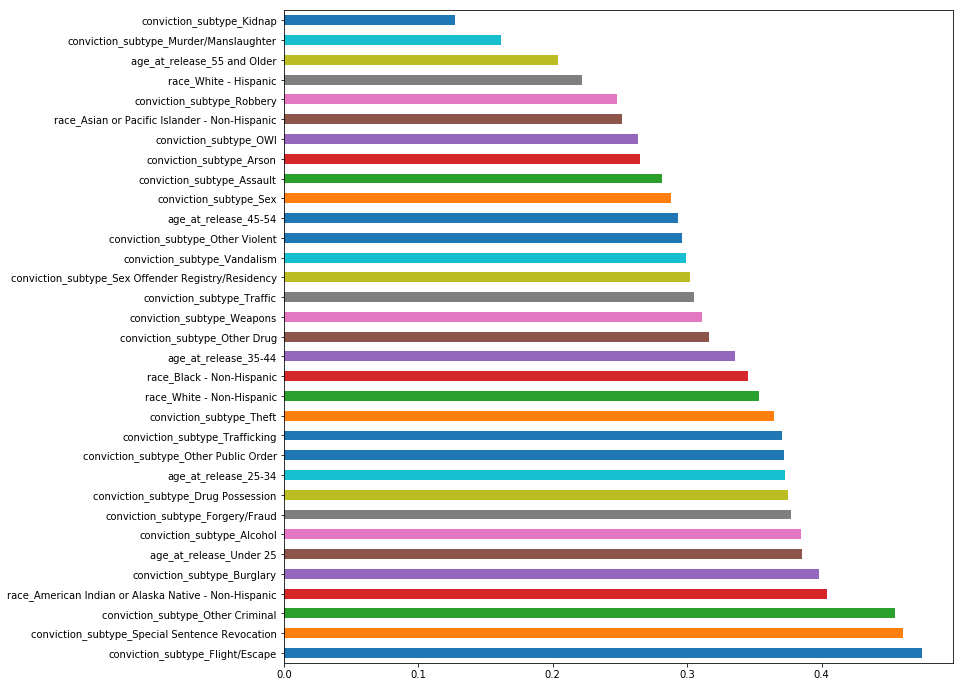

In [55]:
plt.figure(figsize=(12,12))
percent_recid_subt[1:].plot(kind='barh')